In [8]:
import torch
import torch.nn as nn

# Download MNIST dataset
def download_mnist():
    from torchvision import datasets, transforms
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    return train_dataset, test_dataset

# MNIST classification using a simple feedforward neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 28*28)  # Input layer
        self.fc2 = nn.Linear(28*28, 28*28)  # Hidden layer
        self.fc3 = nn.Linear(28*28, 10)     # Output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))  # Activation function for first layer
        x = torch.relu(self.fc2(x))  # Activation function for second layer
        x = self.fc3(x)  # Output layer
        return x

# Training the model
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        for images, labels in train_loader:
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Testing the model
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy of the model on the test set: {100 * correct / total:.2f}%')


In [9]:
# Main function to run the training and testing

train_dataset, test_dataset = download_mnist()
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

model = SimpleNN()  # Initialize the model
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Optimizer

train_model(model, train_loader, criterion, optimizer, epochs=5)  # Train the model
test_model(model, test_loader)  # Test the model

Epoch [1/5], Loss: 0.0714
Epoch [2/5], Loss: 0.0818
Epoch [3/5], Loss: 0.0075
Epoch [4/5], Loss: 0.0516
Epoch [5/5], Loss: 0.0284
Accuracy of the model on the test set: 97.39%


In [10]:
# save model using pickle

import torch
import pickle

def save_model(model, filename='mnist_model.pkl'):
    with open(filename, 'wb') as f:
        pickle.dump(model.state_dict(), f)
    print(f'Model saved to {filename}')

def load_model(model, filename='mnist_model.pkl'):
    with open(filename, 'rb') as f:
        model.load_state_dict(pickle.load(f))
    print(f'Model loaded from {filename}')
    return model


save_model(model)
load_model(model)  # Load the model

Model saved to mnist_model.pkl


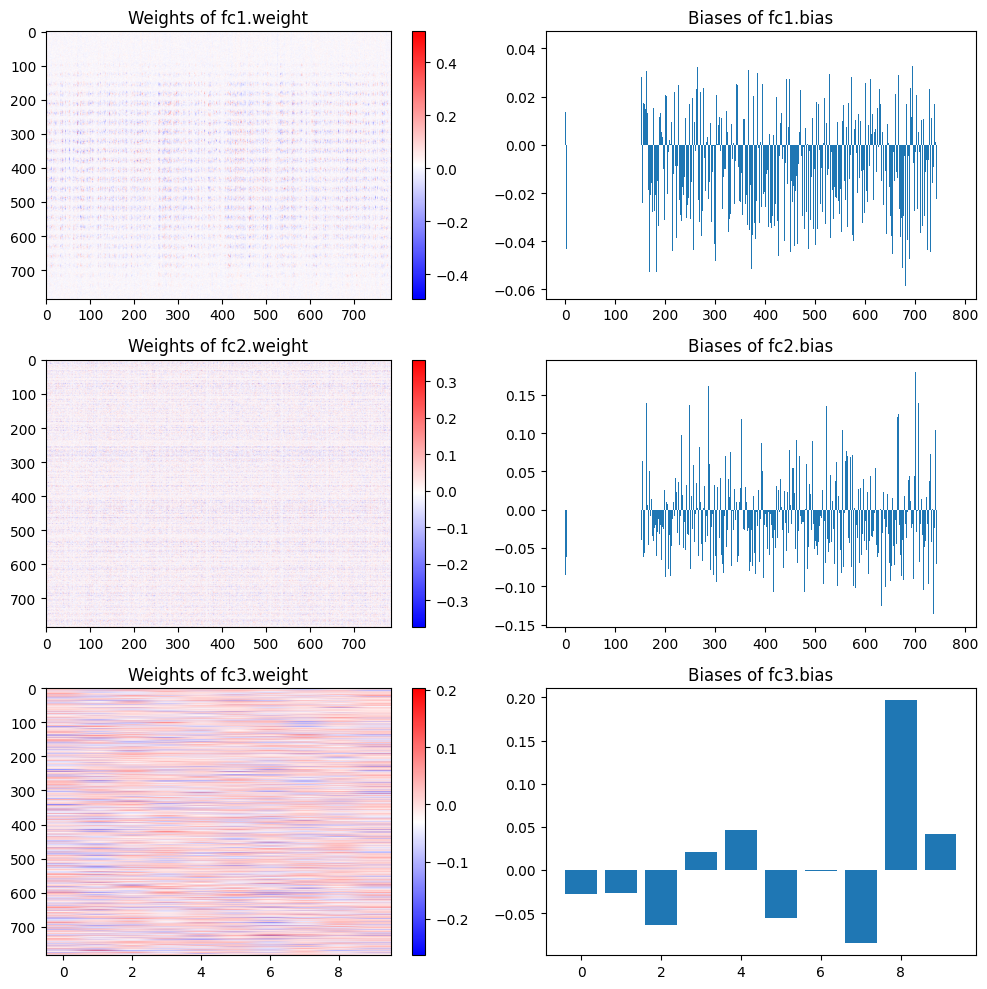

In [41]:
def visualize_all_weights(model):

  fig, axs = plt.subplots(3, 2, figsize=(10, 10))
  axs = axs.flatten()
  for i, (name, param) in enumerate(model.named_parameters()):
    if 'weight' in name:
      weights = param.data.numpy().T
      axs[i].set_title(f'Weights of {name}')
      axs[i].imshow(weights, aspect='auto', cmap='bwr')#, vmin=-0.3, vmax=0.3)
      fig.colorbar(axs[i].images[0], ax=axs[i])
    if 'bias' in name:
      biases = param.data.numpy().T
      axs[i].set_title(f'Biases of {name}')
      axs[i].bar(range(len(biases)), biases)

  plt.tight_layout()
  plt.show()


visualize_all_weights(model)  # Visualize all weights and biases

In [44]:
weights1 = model.fc1.weight.data.numpy().T
weights2 = model.fc2.weight.data.numpy().T
weights3 = model.fc3.weight.data.numpy().T

In [45]:
weights1.shape, weights2.shape, weights3.shape

((784, 784), (784, 784), (784, 10))